In [31]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Enable plots inside the Jupyter NotebookLet the
%matplotlib inline

In [32]:
# Set a seed for the random number generator for reproducibility
np.random.seed(23)

# Number of samples
ns = np.linspace(0, 200, 1000)

# Source matrix
S = np.array([np.sin(ns * 1),
              signal.sawtooth(ns * 1.9),
              np.random.random(len(ns))]).T

# Mixing matrix
A = np.array([[0.5, 1, 0.2],
              [1, 0.5, 0.4],
              [0.5, 0.8, 1]])

# Mixed signal matrix
X = S.dot(A).T

X = np.vstack([X, X, X, X, X, X, X, X, X, X])
np.random.shuffle(X)
print("ns shape: {}, S shape: {}, X shape: {}".format(ns.shape, S.shape, X.shape))

ns shape: (1000,), S shape: (1000, 3), X shape: (30, 1000)


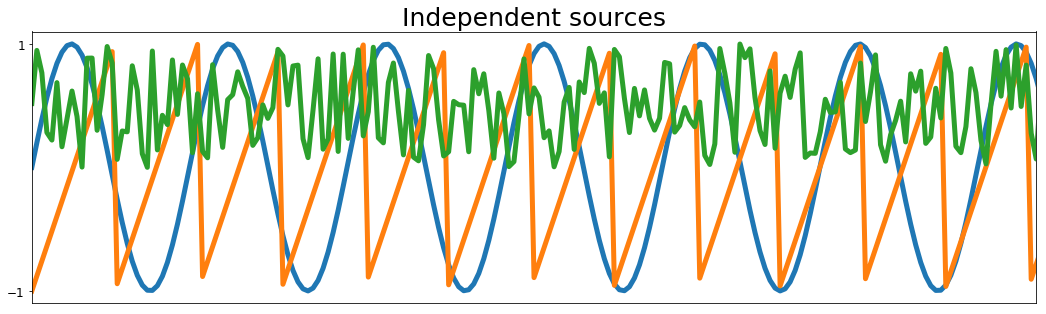

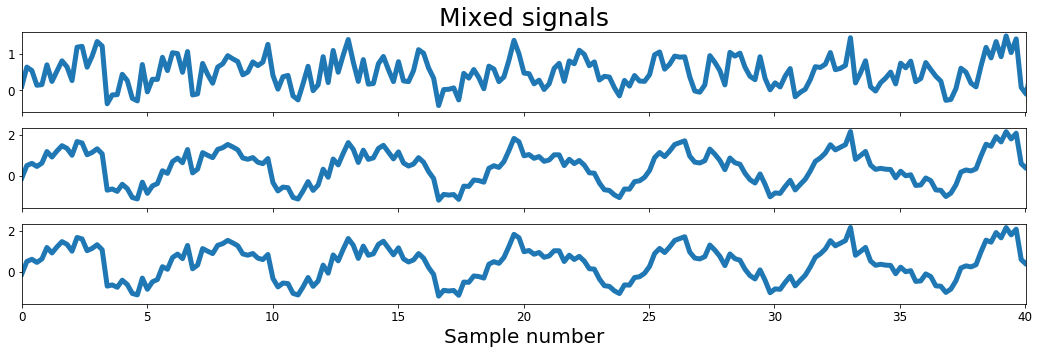

In [33]:
# Plot sources & signals
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(ns, S, lw=5)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_xlim(ns[0], ns[200])
ax.tick_params(labelsize=12)
ax.set_title('Independent sources', fontsize=25)

fig, ax = plt.subplots(3, 1, figsize=[18, 5], sharex=True)
ax[0].plot(ns, X[0], lw=5)
ax[0].set_title('Mixed signals', fontsize=25)
ax[0].tick_params(labelsize=12)

ax[1].plot(ns, X[1], lw=5)
ax[1].tick_params(labelsize=12)
ax[1].set_xlim(ns[0], ns[-1])

ax[2].plot(ns, X[2], lw=5)
ax[2].tick_params(labelsize=12)
ax[2].set_xlim(ns[0], ns[-1])
ax[2].set_xlabel('Sample number', fontsize=20)
ax[2].set_xlim(ns[0], ns[200])

plt.show()

(30, 1000) vs (1000, 3)


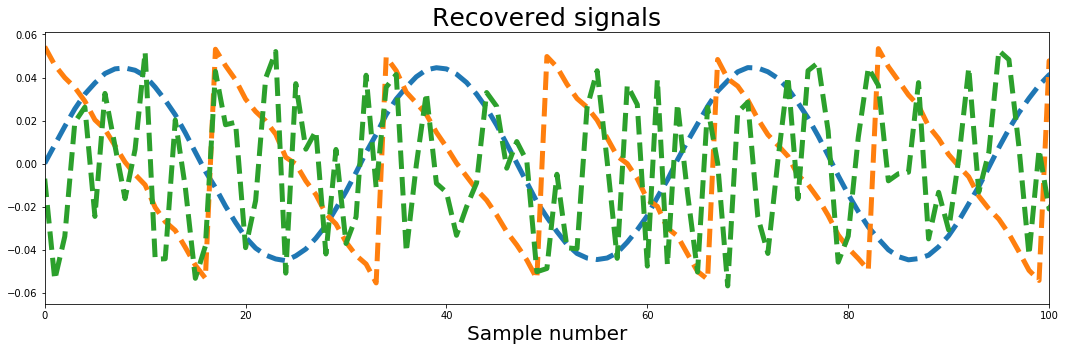

(1000, 3)


(0, 100)

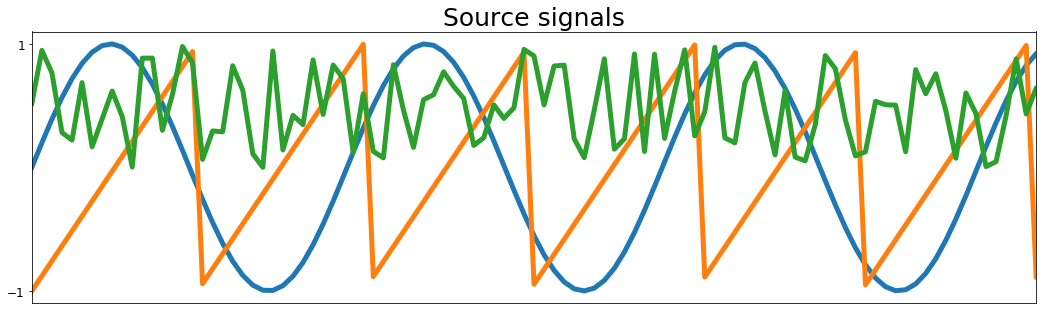

In [34]:
from sklearn.decomposition import FastICA

ica_est = FastICA(n_components=3, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, 
                  max_iter=10000, tol=0.0001, w_init=None, random_state=None)
X_transformed = ica_est.fit_transform(X.T)
print("{} vs {}".format(X.shape, X_transformed.shape))
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(X_transformed, '--', label='Recovered signals', lw=5)
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Recovered signals', fontsize=25)
ax.set_xlim(0, 100)

plt.show()
print(S.shape)
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(S, lw=5)
ax.tick_params(labelsize=12)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_title('Source signals', fontsize=25)
ax.set_xlim(0, 100)

In [43]:
s1 = S.T
t1 = X_transformed.T
print("{} vs {}".format(s1.shape, t1.shape))

(3, 1000) vs (3, 1000)


In [59]:
from scipy.signal import correlate
print(correlate(s1[0], t1[0], mode='valid'))
print(correlate(s1[0], t1[1], mode='valid'))
print(correlate(s1[0], t1[2], mode='valid'))
print(correlate(s1[1], s1[1], mode='valid'))

[-22.38036466]
[-0.14518116]
[0.15296011]
[333.65173381]


In [39]:
df = pd.read_csv("Testzhengdong.csv", header=None)

for label, group_dfs in df.groupby(2048):
    if label == 3:
        label_3 = group_dfs.drop(2048, axis=1).values
    if label == 4:
        label_4 = group_dfs.drop(2048, axis=1).values
    if label == 1:
        label_1 = group_dfs.drop(2048, axis=1).values

In [40]:
print("{} vs {} vs {}".format(label_3.shape, label_4.shape, label_1.shape))

(400, 2048) vs (400, 2048) vs (704, 2048)


(0, 2048)

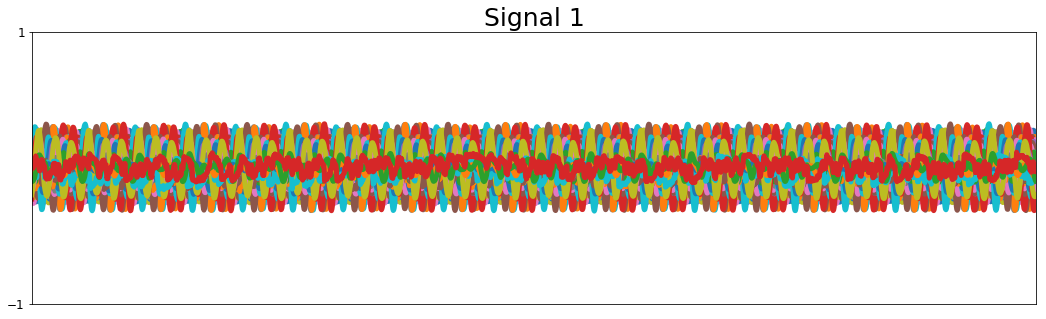

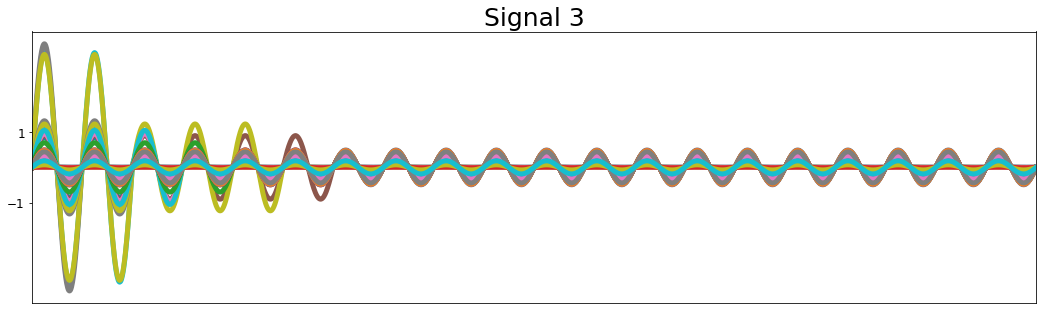

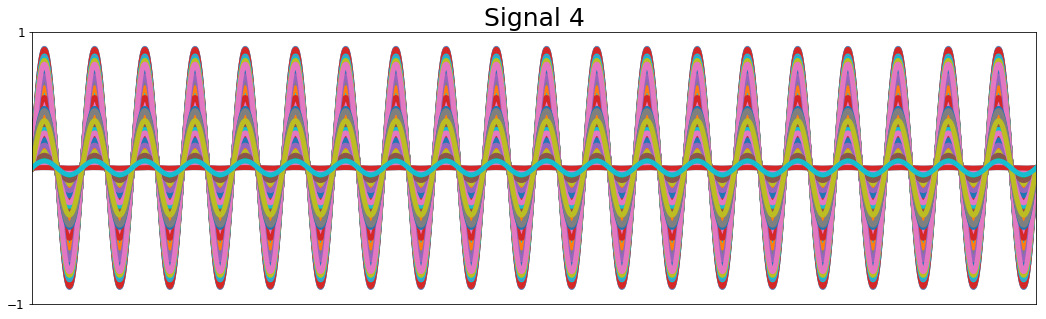

In [17]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(label_1.T, lw=5)
ax.tick_params(labelsize=12)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_title('Signal 1', fontsize=25)
ax.set_xlim(0, 2048)

fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(label_3.T, lw=5)
ax.tick_params(labelsize=12)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_title('Signal 3', fontsize=25)
ax.set_xlim(0, 2048)

fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(label_4.T, lw=5)
ax.tick_params(labelsize=12)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_title('Signal 4', fontsize=25)
ax.set_xlim(0, 2048)

(704, 2048) vs (2048, 3)


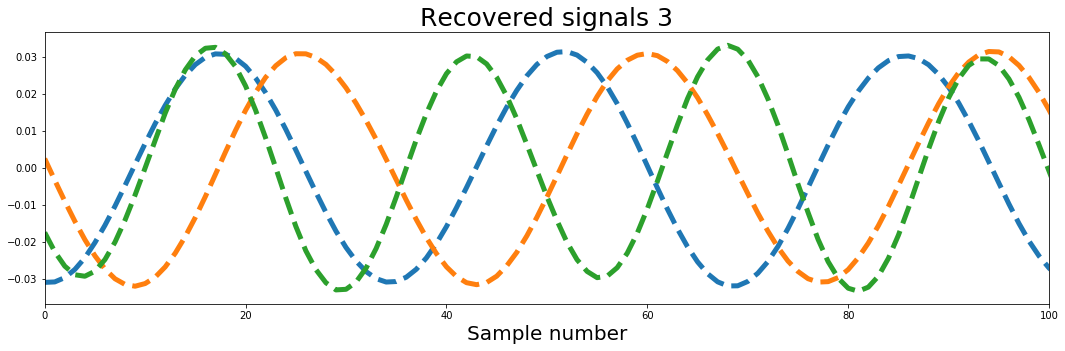

In [54]:
for n_c in range(3, 4):
    ica_est = FastICA(n_components=n_c, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, 
                      max_iter=10000, tol=0.0001, w_init=None, random_state=None)
    label_1_transformed = ica_est.fit_transform(label_1.T)
    print("{} vs {}".format(label_1.shape, label_1_transformed.shape))
    fig, ax = plt.subplots(1, 1, figsize=[18, 5])
    ax.plot(label_1_transformed, '--', label='Recovered signals', lw=5)
    ax.set_xlabel('Sample number', fontsize=20)
    ax.set_title('Recovered signals {}'.format(n_c), fontsize=25)
    ax.set_xlim(0, 100)

    plt.show()

(400, 2048) vs (2048, 3)


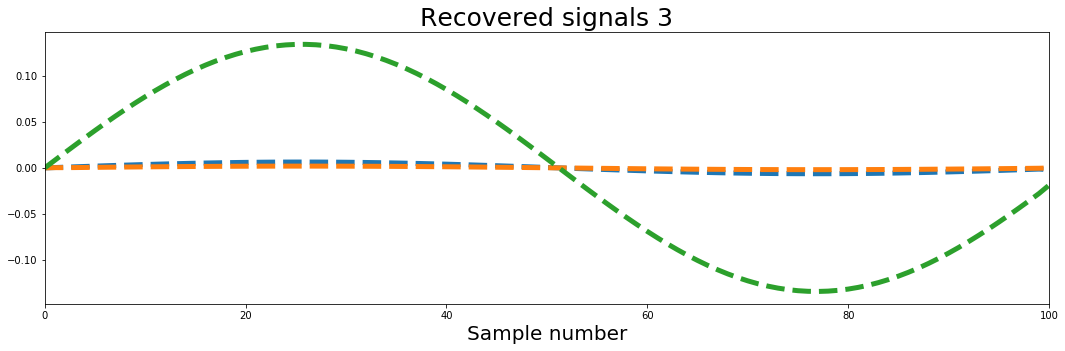

In [55]:
for n_c in range(3, 4):
    ica_est = FastICA(n_components=n_c, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, 
                      max_iter=10000, tol=0.0001, w_init=None, random_state=None)
    label_3_transformed = ica_est.fit_transform(label_3.T)
    print("{} vs {}".format(label_3.shape, label_3_transformed.shape))
    fig, ax = plt.subplots(1, 1, figsize=[18, 5])
    ax.plot(label_3_transformed, '--', label='Recovered signals', lw=5)
    ax.set_xlabel('Sample number', fontsize=20)
    ax.set_title('Recovered signals {}'.format(n_c), fontsize=25)
    ax.set_xlim(0, 100)

    plt.show()

(400, 2048) vs (2048, 3)


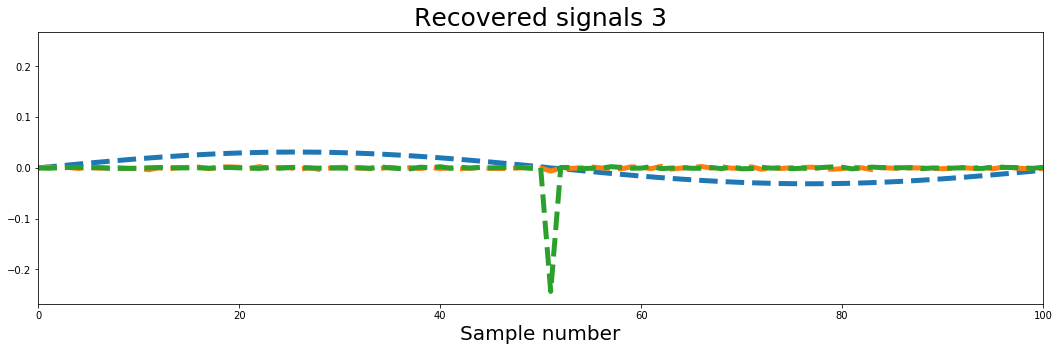

In [56]:
for n_c in range(3, 4):
    ica_est = FastICA(n_components=n_c, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, 
                      max_iter=10000, tol=0.0001, w_init=None, random_state=None)
    label_4_transformed = ica_est.fit_transform(label_4.T)
    print("{} vs {}".format(label_4.shape, label_4_transformed.shape))
    fig, ax = plt.subplots(1, 1, figsize=[18, 5])
    ax.plot(label_4_transformed, '--', label='Recovered signals', lw=5)
    ax.set_xlabel('Sample number', fontsize=20)
    ax.set_title('Recovered signals {}'.format(n_c), fontsize=25)
    ax.set_xlim(0, 100)

    plt.show()

In [57]:
print(label_3_transformed.shape)

(2048, 3)


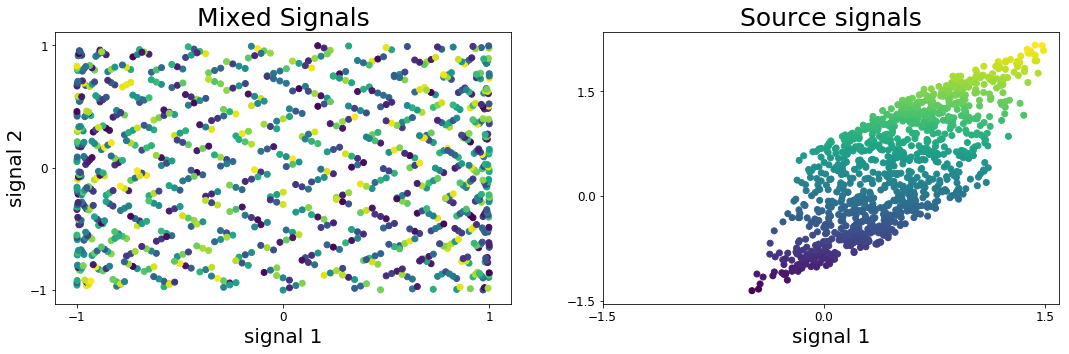

In [41]:
#non gaussian??
fig, ax = plt.subplots(1, 2, figsize=[18, 5])
ax[0].scatter(S.T[0], S.T[1], c=S.T[2])
ax[0].tick_params(labelsize=12)
ax[0].set_yticks([-1, 0, 1])
ax[0].set_xticks([-1, 0, 1])
ax[0].set_xlabel('signal 1', fontsize=20)
ax[0].set_ylabel('signal 2', fontsize=20)
ax[0].set_title('Sources', fontsize=25)

ax[1].scatter(label_3_transformed[0], X[1], c=X[2])
ax[1].tick_params(labelsize=12)
ax[1].set_yticks([-1.5, 0, 1.5])
ax[1].set_xticks([-1.5, 0, 1.5])
ax[1].set_xlabel('signal 1', fontsize=20)
ax[1].set_title('Mixed signals', fontsize=25)
plt.show()

In [60]:
print("{} vs {} vs {}".format(np.max(label_3[0]), np.max(label_4[0]), np.max(label_1[0])))
print("{} vs {} vs {}".format(np.min(label_3[0]), np.min(label_4[0]), np.min(label_1[0])))

print("{} vs {} vs {}".format(np.max(label_3_transformed[0]*1000000), np.max(label_4_transformed[0]*1000000000000), 
                              np.max(label_1_transformed[0])))
print("{} vs {} vs {}".format(np.min(label_3_transformed[0]*1000000), np.min(label_4_transformed[0]*1000000000000), 
                              np.min(label_1_transformed[0])))

0.3 vs 0.011368000000000001 vs 0.104671839
-0.3 vs -0.011368000000000001 vs -0.12710218
2.1262522371311348 vs 2.1059902180062666 vs 0.0024437936669454777
-13.700323277394412 vs 0.0006623018528822369 vs -0.031033618574258733


(2048,) vs (2048,) vs (2048,)


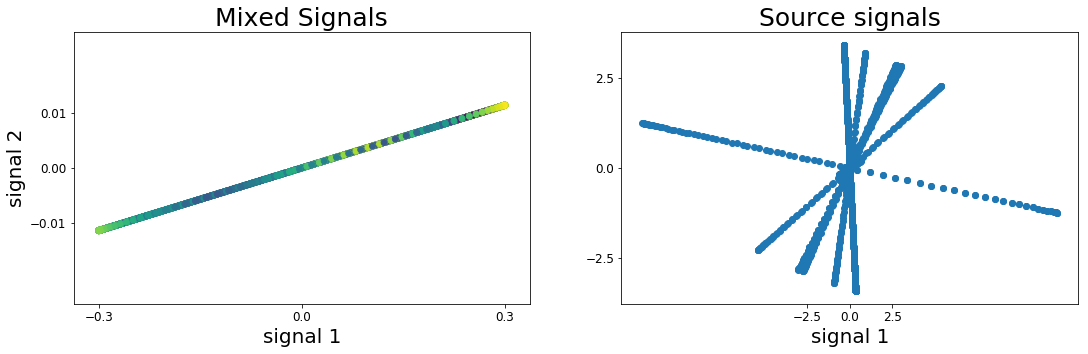

In [70]:
fig, ax = plt.subplots(1, 2, figsize=[18, 5])
print("{} vs {} vs {}".format(label_3[0].shape, label_4[0].shape, label_1[0].shape))
ax[0].scatter(label_3[0], label_4[0], c=label_1[0])
ax[0].tick_params(labelsize=12)
ax[0].set_yticks([-0.01, 0, 0.01])
ax[0].set_xticks([-0.3, 0, 0.3])
ax[0].set_xlabel('signal 1', fontsize=20)
ax[0].set_ylabel('signal 2', fontsize=20)
ax[0].set_title('Mixed Signals', fontsize=25)

ax[1].scatter(label_3_transformed.T[0]*100, label_3_transformed.T[1]*100) #, c=label_3_transformed.T[2])
ax[1].tick_params(labelsize=12)
ax[1].set_yticks([-2.5, 0, 2.5])
ax[1].set_xticks([-2.5, 0, 2.5])
ax[1].set_xlabel('signal 1', fontsize=20)
ax[1].set_title('Source signals', fontsize=25)
plt.show()

In [20]:
# Define two non-gaussian uniform components
s1 = np.random.rand(1000)
s2 = np.random.rand(1000)
s = np.array(([s1, s2]))

# Define two gaussian components
s1n = np.random.normal(size=1000)
s2n = np.random.normal(size=1000)
sn = np.array(([s1n, s2n]))

# Define orthogonal mixing matrix
A = np.array(([0.96, -0.28],[0.28, 0.96]))

# Mix signals
mixedSignals = s.T.dot(A)
mixedSignalsN = sn.T.dot(A)

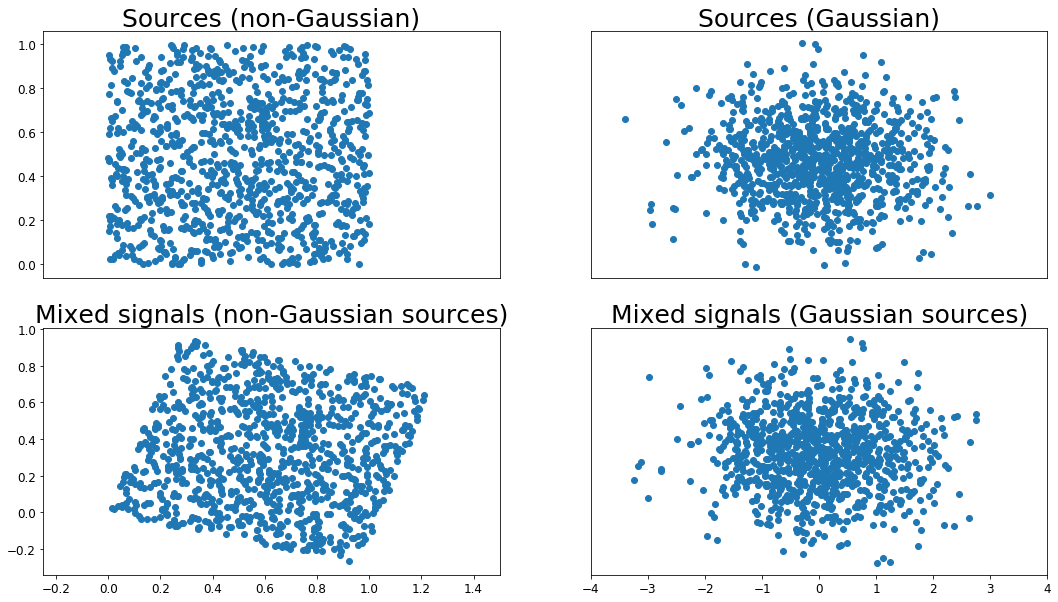

In [21]:
# Plot results
fig, ax = plt.subplots(2, 2, figsize=[18, 10])
ax[0][0].scatter(s[0], s[1])
ax[0][0].tick_params(labelsize=12)
ax[0][0].set_title('Sources (non-Gaussian)', fontsize=25)
ax[0][0].set_xlim([-0.25, 1.5])
ax[0][0].set_xticks([])

ax[0][1].scatter(sn[0], sn[1])
ax[0][1].tick_params(labelsize=12)
ax[0][1].set_title('Sources (Gaussian)', fontsize=25)
ax[0][1].set_xlim([-4, 4])
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

ax[1][0].scatter(mixedSignals.T[0], mixedSignals.T[1])
ax[1][0].tick_params(labelsize=12)
ax[1][0].set_title('Mixed signals (non-Gaussian sources)', fontsize=25)
ax[1][0].set_xlim([-0.25, 1.5])

ax[1][1].scatter(mixedSignalsN.T[0], mixedSignalsN.T[1])
ax[1][1].tick_params(labelsize=12)
ax[1][1].set_title('Mixed signals (Gaussian sources)', fontsize=25)
ax[1][1].set_xlim([-4, 4])
ax[1][1].set_yticks([])

plt.show()

In [28]:
print(label_3[200].shape)

(2048,)


In [29]:
print(mixedSignals.T[0].shape)

(1000,)
